In [1]:
#Read in file names and paths from the input directory
from os import walk
import os

filePath = 'input'
f = {}
for (dirpath, dirnames, filenames) in walk(filePath):
    if filenames:
        f[dirpath.rsplit('/', 1)[-1]] = list(os.path.join(dirpath, x) for x in filenames)
    
f

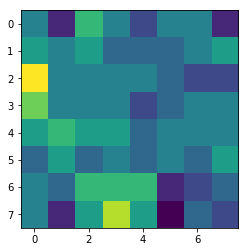

In [2]:
#Read in CSV files
import pandas as pd

data = []
labels = []
label_names = []

index = 0
for key in f:
    for fileName in f[key]:
        #read csv
        df = pd.read_csv(fileName, header=None, usecols=lambda x: x < 64)
        #add to data
        data.append(df.values[0])
        #add label
        labels.append(index)
    #add label name    
    label_names.append(key)
    index += 1

#Print test images
import matplotlib.pyplot as plt
%matplotlib inline
plt.imshow(data[0].reshape((8,8)))

In [18]:
df


,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,19.5,19.25,20.5,20.0,19.5,20.0,19.75,19.5,19.75,19.75,...,18.25,18.5,19.25,20.0,20.0,18.75,18.75,18.25,18.25,18.75


In [4]:
from sklearn.preprocessing import MinMaxScaler

scaler_model = MinMaxScaler()
scaler_model.fit(data)
data = scaler_model.transform(data)

In [5]:
data[0]

array([0.5       , 0.45833333, 0.61904762, 0.47826087, 0.52173913,
       0.52      , 0.56521739, 0.39285714, 0.68181818, 0.57692308,
       0.58333333, 0.57692308, 0.53846154, 0.53846154, 0.5       ,
       0.47826087, 0.80769231, 0.60714286, 0.62962963, 0.5862069 ,
       0.6       , 0.53571429, 0.46153846, 0.41666667, 0.73913043,
       0.57142857, 0.61538462, 0.6       , 0.56666667, 0.60714286,
       0.60714286, 0.52173913, 0.66666667, 0.75      , 0.62068966,
       0.63333333, 0.59375   , 0.57142857, 0.46153846, 0.45454545,
       0.45833333, 0.64      , 0.54166667, 0.58333333, 0.59259259,
       0.57142857, 0.52      , 0.47826087, 0.54166667, 0.5       ,
       0.68      , 0.65384615, 0.65384615, 0.47826087, 0.36363636,
       0.42857143, 0.59259259, 0.45454545, 0.66666667, 0.69565217,
       0.6       , 0.43478261, 0.43478261, 0.45454545])

In [6]:
from sklearn.model_selection import train_test_split
import numpy as np

X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)

X_train = np.array(X_train);
y_train = np.array(y_train);
X_test = np.array(X_test);
y_test = np.array(y_test);



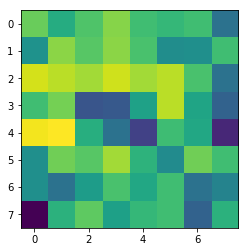

In [7]:
plt.imshow(X_train[0].reshape((8,8)))

In [8]:
from tensorflow.python.keras.applications import ResNet50
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense, Flatten, GlobalAveragePooling2D, Dropout

num_classes = index
resnet_weights_path = filePath + '/resnet50_weights_tf_dim_ordering_tf_kernels_notop.h5'

my_new_model = Sequential()
my_new_model.add(Dropout(0.05));
# my_new_model.add(ResNet50(include_top=False, pooling='avg', weights=resnet_weights_path))
#my_new_model.add(Dense(64, activation='relu'))
my_new_model.add(Dense(16, activation='relu'))
my_new_model.add(Dropout(0.2));
my_new_model.add(Dense(16, activation='relu'))
my_new_model.add(Dropout(0.2));
my_new_model.add(Dense(8, activation='relu'))
my_new_model.add(Dropout(0.2));
my_new_model.add(Dense(4, activation='relu'))
my_new_model.add(Dropout(0.2));
# my_new_model.add(Dense(16, activation='relu'))
# my_new_model.add(Dropout(0.2));
# my_new_model.add(Dense(8, activation='relu'))
# my_new_model.add(Dense(4, activation='relu'))
# my_new_model.add(Dense(4, activation='relu'))
my_new_model.add(Dense(num_classes, activation='softmax'))

# Say not to train first layer (ResNet) model. It is already trained
# my_new_model.layers[0].trainable = False

In [9]:
from tensorflow.python.keras import optimizers

sgd = optimizers.SGD(lr=0.001, clipnorm=1.)
my_new_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [10]:

#data
my_new_model.fit(
        X_train, y_train,
#         validation_split=0.1,
        validation_data=(X_test, y_test),
        validation_steps=10,
        steps_per_epoch=10000,
        epochs=5)

Epoch 1/5
10000/10000 [==============================] - 11s 1ms/step - loss: 0.2995 - acc: 0.8731 - val_loss: 0.1297 - val_acc: 0.9355
Epoch 2/5
10000/10000 [==============================] - 11s 1ms/step - loss: 0.2079 - acc: 0.9211 - val_loss: 0.1207 - val_acc: 0.9355
Epoch 3/5
10000/10000 [==============================] - 11s 1ms/step - loss: 0.1759 - acc: 0.9345 - val_loss: 0.1394 - val_acc: 0.9355
Epoch 4/5
10000/10000 [==============================] - 11s 1ms/step - loss: 0.1604 - acc: 0.9411 - val_loss: 0.1053 - val_acc: 0.9677
Epoch 5/5
10000/10000 [==============================] - 11s 1ms/step - loss: 0.1509 - acc: 0.9453 - val_loss: 0.1979 - val_acc: 0.9355


In [11]:
print(my_new_model.metrics_names)
print(my_new_model.evaluate(X_test, y_test))


['loss', 'acc']
31/31 [==============================] - 0s 38us/step
[0.19788134098052979, 0.9354838728904724]


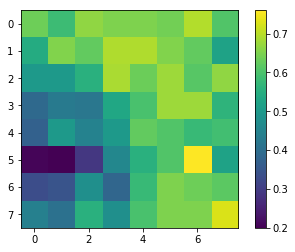

Should be: pee
['dry', 'pee']
[[1.4299304e-04 9.9985695e-01]]
Prediction: pee


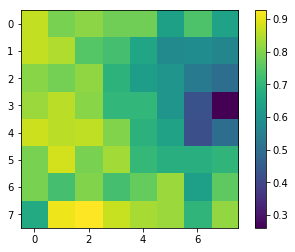

Should be: pee
['dry', 'pee']
[[1.1456316e-05 9.9998856e-01]]
Prediction: pee


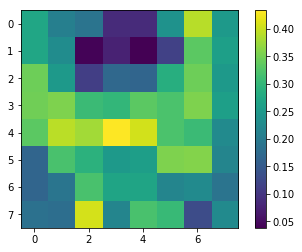

Should be: pee
['dry', 'pee']
[[5.278348e-07 9.999995e-01]]
Prediction: pee


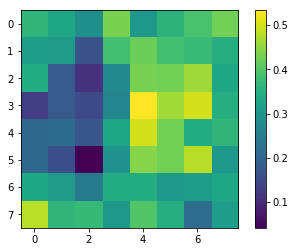

Should be: pee
['dry', 'pee']
[[6.077443e-08 9.999999e-01]]
Prediction: pee


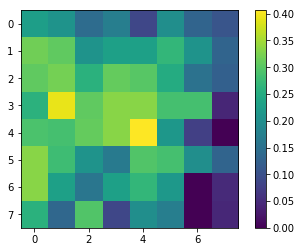

Should be: dry
['dry', 'pee']
[[0.50719506 0.49280488]]
Prediction: dry


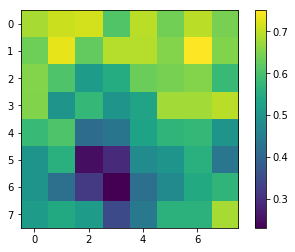

Should be: pee
['dry', 'pee']
[[1.3920639e-05 9.9998605e-01]]
Prediction: pee


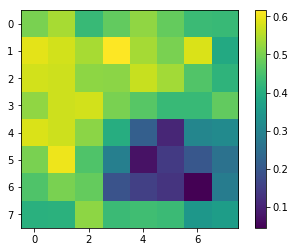

Should be: pee
['dry', 'pee']
[[2.4704576e-08 1.0000000e+00]]
Prediction: pee


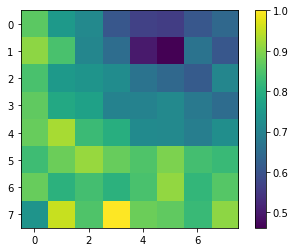

Should be: pee
['dry', 'pee']
[[1.1719277e-06 9.9999881e-01]]
Prediction: pee


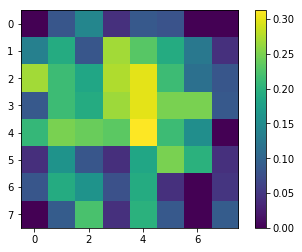

Should be: dry
['dry', 'pee']
[[0.74978834 0.25021163]]
Prediction: dry


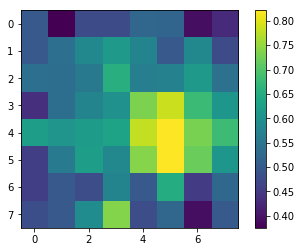

Should be: dry
['dry', 'pee']
[[0.9529685 0.0470315]]
Prediction: dry


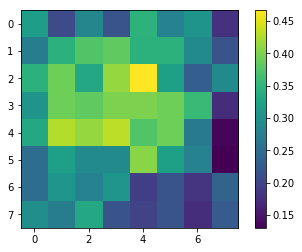

Should be: dry
['dry', 'pee']
[[0.9267759 0.0732241]]
Prediction: dry


In [12]:
import matplotlib.pyplot as plt


for i in range (0,11):
    image = X_test[i]
    pred = my_new_model.predict(X_test[i:i+1])
    
    plt.imshow(image.reshape((8,8)))
    plt.colorbar()
    plt.show()
    print("Should be: " + label_names[y_test[i]])
    print(label_names)
    print(pred)
    print("Prediction: " + label_names[pred.argmax()]) 
